## Lab | Classification, Handling Imbalanced Data

For this lab we will build a model on customer churn binary classification problem. You will be using Data/DATA_Customer-Churn.csv file.

#### Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

#### Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
-- Scale the features either by using normalizer or a standard scaler.
-- Split the data into a training set and a test set.
-- Fit a logistic Regression model on the training data.
-- Fit a Knn Classifier model on the training data

### Import Lybraries

In [464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50


In [465]:
churnData = pd.read_csv('Data/DATA_Customer-Churn.csv')
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


### Check the datatypes of all the columns

In [466]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

### Convert TotalCharges into numeric type using pd.to_numeric function.

In [467]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [468]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

### Check and replace the null values in the Data Frame

In [469]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [470]:
churnData = churnData.dropna()

In [471]:
churnData.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic Regression model on the training data.
- Fit a Knn Classifier model on the training data

In [472]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X = churnData[['tenure','SeniorCitizen', 'MonthlyCharges','TotalCharges']]
y = churnData[['Churn']]

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

log_model = LogisticRegression() 

In [473]:
X.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [474]:
y.dtypes

Churn    object
dtype: object

In [475]:
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


### Fit the Logistic Regression model
Classification Analysis

In [476]:
# Create the Model
# Data Transformer
trans = PowerTransformer()    # the powerTransformer standardize the data by default
                              # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

    
trans.fit(X_train)      # fit only the train because we use the test after to test the model.

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

#### Check the Accuracy, Precision and Recall of the Model

In [477]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_log, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_log, pos_label='Yes')]})
                                         # pos_label='Yes' let you working with objects in the test set. and Hilal is the best :)

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.65,0.71
2,Recall,0.42,0.41


Confusion matrix for the train set
[[3841  326]
 [ 848  610]]


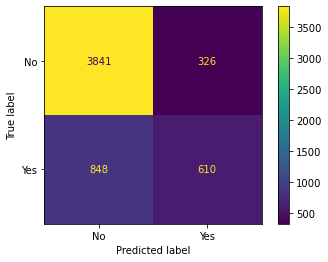


Confusion matrix for the test set
[[927  69]
 [243 168]]


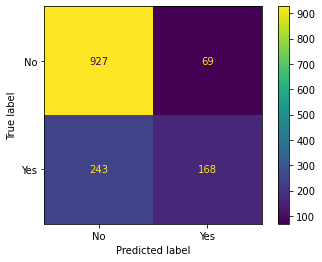

In [478]:
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

### Fit a Knn Classifier model on the training data
Classification analysis

In [479]:
from sklearn.neighbors import KNeighborsClassifier

X2 = churnData[['tenure','SeniorCitizen', 'MonthlyCharges','TotalCharges']]
y2 = churnData[['Churn']]

model = KNeighborsClassifier(n_neighbors=2,weights='uniform')
model.fit(X2_train, y2_train)
y2_pred=model.predict(X2_test)
y2_pred_train=model.predict(X2_train)
#model.predict_proba(inputdata)


#### Check the Accuracy, Precision and Recall of the Model

In [480]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def evaluate_classification_model(y2_train, y2_pred_train, y2_test, y2_pred_test):
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y2_train, y2_pred_train),
                                         precision_score(y2_train, y2_pred_train, pos_label='Yes'),
                                         recall_score(y2_train, y2_pred_train, pos_label='Yes')],
                               'Test': [accuracy_score(y2_test, y2_pred_test),
                                        precision_score(y2_test, y2_pred_test, pos_label='Yes'),
                                        recall_score(y2_test, y2_pred_test, pos_label='Yes')]})
    

    return performance_df

evaluate_classification_model(y2_train, y2_pred_train, y2_test, y2_pred)
                                                    


,Error_metric,Train,Test
0,Accuracy,0.86,0.76
1,Precision,1.00,0.69
2,Recall,0.46,0.31


#### Plot the Confusion Matrix of the predict model

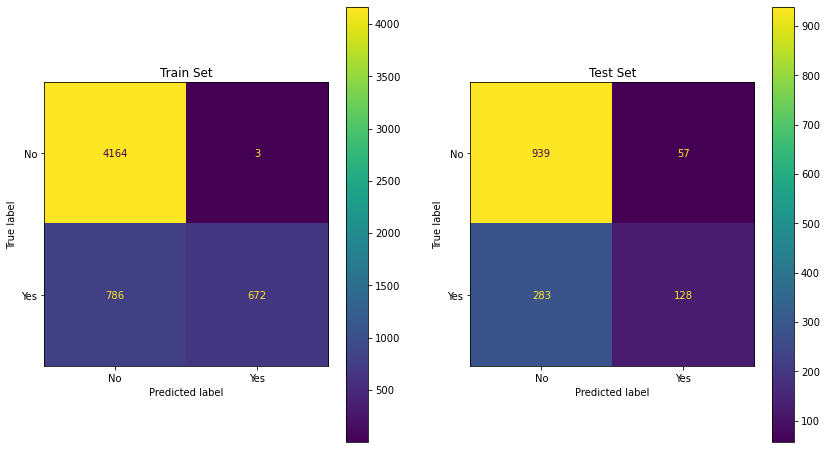

In [481]:

from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(model,X2_train,y2_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X2_test,y2_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

## Round 2

- Fit a Decision Tree Classifier on the training data.
- Check the accuracy on the test data.

### Fit a Decision Tree Classifier on the training data.
Note: with the Decision Tree method do not standardize the data.

In [482]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

Confusion matrix for the train set
[[3355  709]
 [ 246  612]]


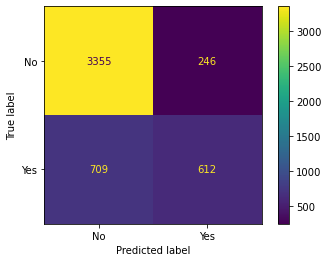



Confusion matrix for the test set
[[1422  327]
 [ 140  221]]


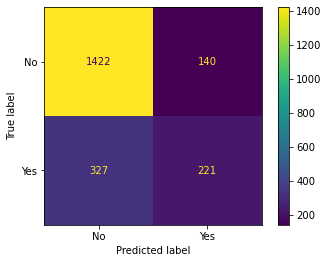

In [494]:
X3 = churnData[['tenure','SeniorCitizen', 'MonthlyCharges','TotalCharges']]
y3 = churnData[['Churn']]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=17)


# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 

dt = DecisionTreeClassifier(max_features=4, random_state=123, max_depth=6, min_samples_split=5, min_samples_leaf=1)

dt.fit(X3_train, y3_train)

y3_pred_train_dt = dt.predict(X3_train)
y3_pred_test_dt = dt.predict(X3_test)


# Plot the confusion matrix
print("Confusion matrix for the train set")
print(confusion_matrix(y3_train,y3_pred_train_dt).T)
plot_confusion_matrix(dt,X3_train,y3_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y3_test,y3_pred_test_dt).T)
plot_confusion_matrix(dt,X3_test,y3_test, values_format = 'd')
plt.show()

#### Check the accuracy on the test data.

In [493]:

# Calculate 'Accuracy','Precision','Recall' of the model.
performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y3_train, y3_pred_train_dt),
                                         precision_score(y3_train, y3_pred_train_dt, pos_label='Yes'),
                                         recall_score(y3_train, y3_pred_train_dt, pos_label='Yes')],
                               'Test': [accuracy_score(y3_test, y3_pred_test_dt),
                                        precision_score(y3_test, y3_pred_test_dt, pos_label='Yes'),
                                        recall_score(y3_test, y3_pred_test_dt, pos_label='Yes')]})

display(performance_df)



,Error_metric,Train,Test
0,Accuracy,0.81,0.78
1,Precision,0.71,0.61
2,Recall,0.46,0.40


#### Show the Tree

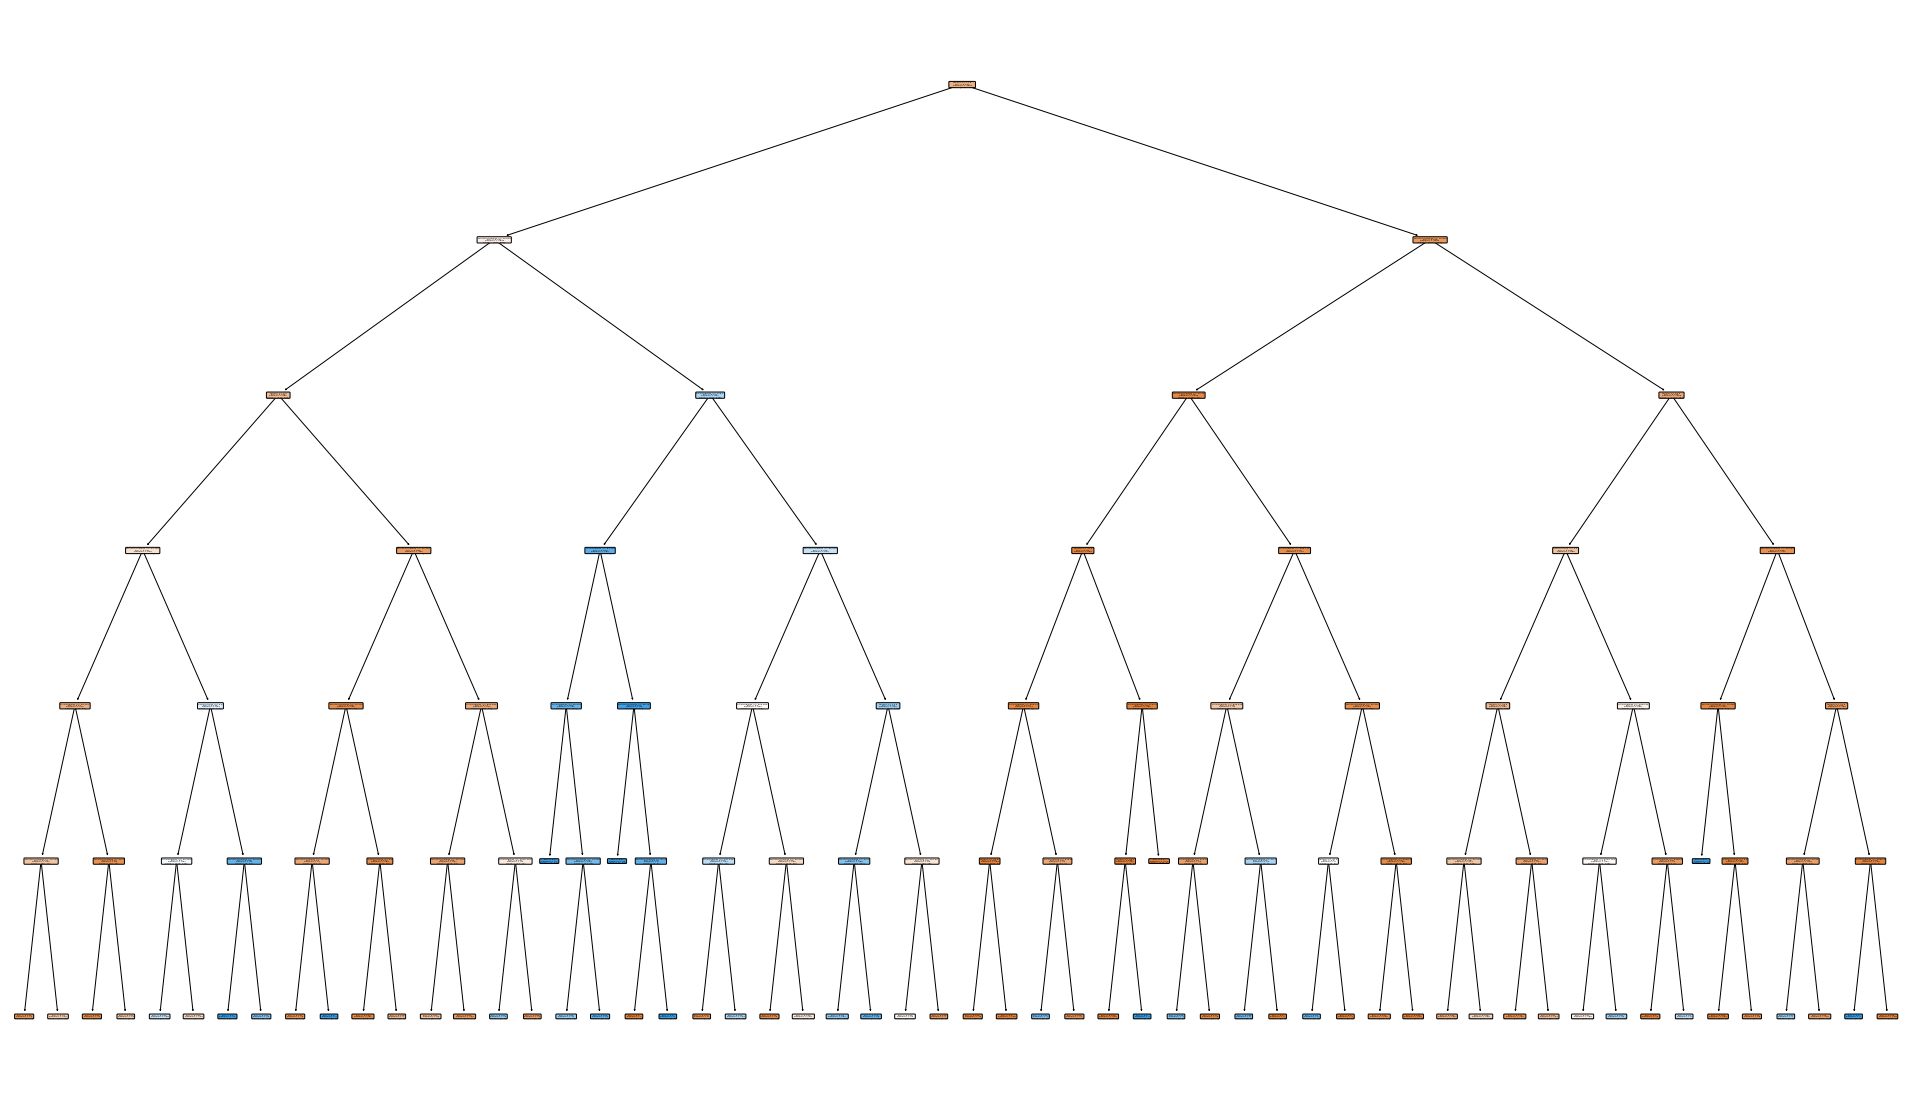

In [484]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X3.columns)
plt.show() 

#### Plot the Features Importance

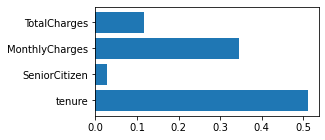

In [491]:
plt.figure(figsize=(4,2))
plt.barh(X3.columns, dt.feature_importances_)
plt.show()
